<a href="https://colab.research.google.com/github/muhammadhaerul25/Machine-Learning/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import tensorflow as tf
tf.test.gpu_device_name()
!nvida

/bin/bash: nvida: command not found


In [1]:
import pandas as pd

##**Simple Linear Regression**

In [78]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/bensin.csv')
df

,Liter,Kilometer
0,20,142.0
1,25,177.0
2,20,144.0
3,30,203.0
4,40,273.0
...,...,...
60,31,203.0
61,37,241.0
62,23,142.0
63,36,241.0


###**Data Exploration**

In [79]:
df.describe()

,Liter,Kilometer
count,65.000000,65.000000
mean,26.446154,181.064615
std,7.424686,49.741763
min,6.000000,32.000000
25%,23.000000,144.000000
50%,25.000000,177.000000
75%,30.000000,212.000000
max,45.000000,278.000000


**Note:** Data training harus mewakili rentang nilai dari min to max

In [80]:
import numpy as np
import sklearn.model_selection as ms

In [81]:
#separate X and y
liter = df[['Liter']]
kilometer = df[['Kilometer']]

#Build a model
X_train, X_test, y_train, y_test = ms.train_test_split(liter, kilometer, test_size=0.2, random_state=0)

#show size
print('X_train size =', X_train.size, '|', 'X_test size =', X_test.size)

X_train size = 52 | X_test size = 13


####**Check statistics of data split**

In [82]:
X_train.describe()

,Liter
count,52.000000
mean,26.673077
std,7.221214
min,6.000000
25%,23.000000
50%,25.000000
75%,30.000000
max,45.000000


In [83]:
X_test.describe()

,Liter
count,13.000000
mean,25.538462
std,8.442111
min,10.000000
25%,20.000000
50%,25.000000
75%,30.000000
max,40.000000


In [84]:
y_train.describe()

,Kilometer
count,52.000000
mean,182.903846
std,47.746532
min,32.000000
25%,150.250000
50%,178.000000
75%,212.025000
max,273.000000


In [85]:
y_test.describe()

,Kilometer
count,13.000000
mean,173.707692
std,58.598727
min,65.000000
25%,144.000000
50%,167.000000
75%,211.000000
max,278.000000


In [86]:
import matplotlib.pyplot as plt

###**Data Visualization**

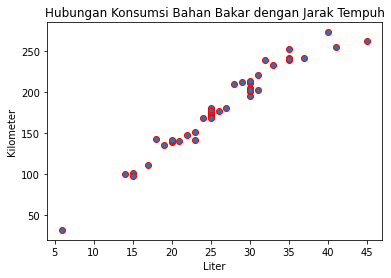

In [87]:
plt.scatter(X_train, y_train, edgecolor='r')
plt.xlabel('Liter')
plt.ylabel('Kilometer')
plt.title("Hubungan Konsumsi Bahan Bakar dengan Jarak Tempuh")

plt.show()

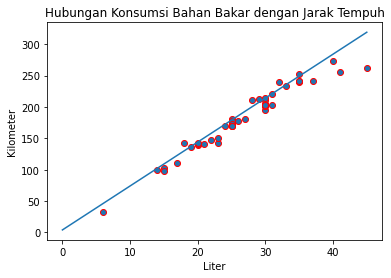

In [88]:
plt.scatter(X_train, y_train, edgecolor='r')
plt.xlabel('Liter')
plt.ylabel('Kilometer')
plt.title("Hubungan Konsumsi Bahan Bakar dengan Jarak Tempuh")

#create a line regression
x1 = np.linspace(0,45)
y1 = 4+7*x1
plt.plot(x1, y1)

plt.show()

**Note:** Using cost function to create a fit model

###**Model Training**

In [89]:
import sklearn.linear_model as lm

model1 = lm.LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [90]:
a = float(model1.intercept_)
b = float(model1.coef_)

print('Nilai slope =', a)
print('Nilai intercept =', b)

#fit model
print('y =', a, "+", b, "x" )

Nilai slope = 10.641222494594757
Nilai intercept = 6.458295912243023
y = 10.641222494594757 + 6.458295912243023 x


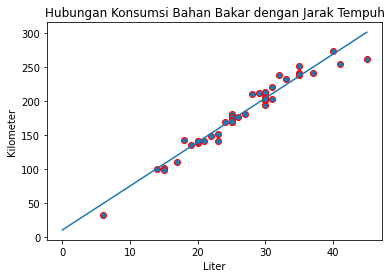

In [91]:
plt.scatter(X_train, y_train, edgecolor='r')
plt.xlabel('Liter')
plt.ylabel('Kilometer')
plt.title("Hubungan Konsumsi Bahan Bakar dengan Jarak Tempuh")

#create a line regression
x1 = np.linspace(0,45)
y1 = a+b*x1
plt.plot(x1, y1)

plt.show()

###**Scoring Model**

In [92]:
#R-Squared
r2 = model1.score(X_test, y_test)
print(r2)

0.9798523775622333


**Note:** Jika nilai R-Square semakin mendekati 1, maka model semakin baik

In [93]:
#real value vs predict
predict = model1.predict(X_test)
print('Predict')
print(predict)
print()
print(y_test)

#difference
dif = predict - y_test
print()
print(dif)

Predict
[[107.51566118]
 [172.0986203 ]
 [172.0986203 ]
 [159.18202848]
 [139.80714074]
 [268.97305898]
 [204.39009986]
 [236.68157942]
 [ 75.22418162]
 [243.13987534]
 [172.0986203 ]
 [139.80714074]
 [191.47350804]]

    Kilometer
45      102.0
29      167.0
43      177.0
62      142.0
34      144.0
33      278.0
31      211.0
40      241.0
26       65.0
63      241.0
22      166.2
2       144.0
11      180.0

    Kilometer
45   5.515661
29   5.098620
43  -4.901380
62  17.182028
34  -4.192859
33  -9.026941
31  -6.609900
40  -4.318421
26  10.224182
63   2.139875
22   5.898620
2   -4.192859
11  11.473508
